## Premiers pas avec PyTorch pour la NLP

PyTorch est une bibliothèque d'apprentissage automatique basée sur Python. Il se compose de deux caractéristiques principales : sa capacité à effectuer ecacement des opérations de tenseur avec une accélération matérielle (à l'aide de GPU) et sa capacité à créer des réseaux de neurones profonds. PyTorch utilise également des graphiques de calcul dynamiques au lieu de graphiques statiques, ce qui le distingue des bibliothèques similaires telles que TensorFlow. En démontrant comment le langage peut être représenté à l'aide de tenseurs et comment les réseaux de neurones peuvent être utilisés pour apprendre le NLP, nous montrerons que ces deux fonctionnalités sont particulièrement utiles pour le traitement du langage naturel.

Dans ce guide, nous allons vous montrer comment faire fonctionner PyTorch sur votre ordinateur, ainsi que démontrer certaines de ses fonctionnalités clés. Nous comparerons ensuite PyTorch à d'autres frameworks d'apprentissage en profondeur, avant d'explorer certaines des fonctionnalités de NLP de PyTorch, telles que sa capacité à effectuer des opérations de tenseur, et enfin montrer comment construire un réseau de neurones simple. En résumé, ce guide couvrira les sujets suivants :

* Installation de PyTorch
* Comparaison de PyTorch avec d'autres frameworks d'apprentissage en profondeur
* Fonctionnalité NLP de PyTorch

## Installation et utilisation de PyTorch

Comme la plupart des packages Python, PyTorch est très simple à installer. Il existe deux manières principales de procéder. La première consiste à l'installer simplement en utilisant pip dans la ligne de commande. Tapez simplement la commande suivante:

    pip install torch torchvision


Bien que cette méthode d'installation soit rapide, il est recommandé d'installer à la place en utilisant Anaconda, car cela inclut toutes les dépendances et les binaires requis pour que PyTorch s'exécute. De plus, Anaconda sera nécessaire plus tard pour activer les modèles d'entraînement sur un GPU à l'aide de CUDA. PyTorch peut être installé via Anaconda en entrant ce qui suit dans la ligne de commande:

    conda install torch torchvision -c pytorch


Pour vérifier que PyTorch fonctionne correctement, nous pouvons ouvrir un bloc-notes Jupyter et exécuter quelques commandes simples :


In [1]:
import torch
x = torch.tensor([1.,2.])

## Tensors

Avant de continuer, il est important que vous soyez pleinement conscient des propriétés d'un tenseur. Les tenseurs ont une propriété connue sous le nom d'ordre, qui détermine essentiellement la dimensionnalité d'un tenseur. Un tenseur d'ordre un est un tenseur à une seule dimension, ce qui équivaut à un vecteur ou à une liste de nombres. Un tenseur d'ordre 2 est un tenseur à deux dimensions, équivalent à une matrice, alors qu'un tenseur d'ordre 3 est constitué de trois dimensions. Il n'y a pas de limite à l'ordre maximum qu'un tenseur peut avoir dans PyTorch

## Activation de l'accélération PyTorch à l'aide de CUDA

L'un des principaux avantages de PyTorch est sa capacité à permettre l'accélération grâce à l'utilisation d'une unité de traitement graphique (GPU). L'apprentissage en profondeur est une tâche de calcul qui est facilement parallélisable, ce qui signifie que les calculs peuvent être décomposés en tâches plus petites et calculés sur de nombreux processeurs plus petits. Cela signifie qu'au lieu d'avoir à exécuter la tâche sur un seul processeur, il est plus efficace d'effectuer le calcul sur un GPU.


Les GPU ont été créés à l'origine pour restituer efficacement les graphiques, mais depuis que l'apprentissage en profondeur est devenu de plus en plus populaire, les GPU ont été fréquemment utilisés pour leur capacité à effectuer plusieurs calculs simultanément. Alors qu'un processeur traditionnel peut comprendre environ quatre ou huit cœurs, un GPU se compose de centaines de cœurs plus petits. Étant donné que les calculs peuvent être exécutés simultanément sur tous ces cœurs, les GPU peuvent rapidement réduire le temps nécessaire pour effectuer des tâches d'apprentissage en profondeur.

Considérons un seul passage dans un réseau de neurones. Nous pouvons prendre un petit lot de données, le faire passer par notre réseau pour obtenir notre perte, puis rétropropager, en ajustant nos paramètres en fonction des gradients. Si nous avons de nombreux lots de données à refaire, sur un processeur traditionnel, nous devons attendre que le lot 1 soit terminé avant de pouvoir le calculer pour le lot 2


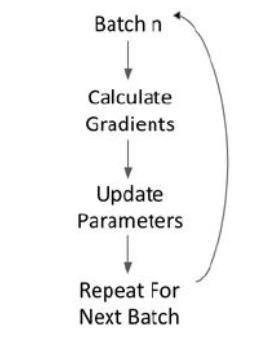

Cependant, sur un GPU, nous pouvons effectuer toutes ces étapes simultanément, ce qui signifie qu'il n'est pas nécessaire que le lot 1 se termine avant que le lot 2 puisse être démarré. Nous pouvons calculer les mises à jour des paramètres pour tous les lots simultanément, puis effectuer toutes les mises à jour des paramètres en une seule fois (car les résultats sont indépendants les uns des autres). L'approche parallèle peut considérablement accélérer le processus d'apprentissage automatique.


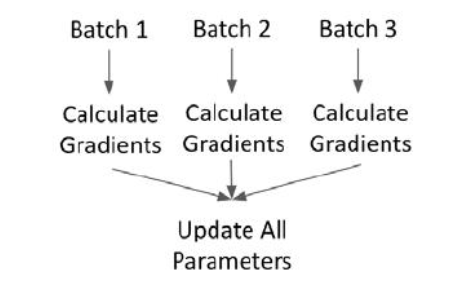

Compute United Device Architecture (CUDA) est la technologie spécifique aux GPU Nvidia qui permet l'accélération matérielle sur PyTorch. Afin d'activer CUDA, nous devons d'abord nous assurer que la carte graphique de notre système est compatible CUDA. Une liste des GPU compatibles CUDA est disponible ici : https://developer.nvidia.com/cuda-gpus. Si vous disposez d'un GPU compatible CUDA, CUDA peut être installé à partir de ce lien : https://developer.nvidia.com/cuda-downloads. Nous allons l'activer en suivant les étapes suivantes

1. Premièrement, afin d'activer réellement la prise en charge de CUDA sur PyTorch, vous devrez créer PyTorch à partir des sources. Des détails sur la façon dont cela peut être fait peuvent être trouvés ici : https://github.com/pytorch/pytorch#from-source.

2. En fait, pour réellement CUDA dans notre code PyTorch, nous devons taper ce qui suit dans notre code Python :


    cuda = torch.device('cuda')


Cela définit le nom de notre périphérique CUDA par défaut sur « cuda »

3. Nous pouvons ensuite exécuter des opérations sur ce périphérique en spécifiant manuellement l'argument de périphérique dans toutes les opérations de tenseur :


    x = torch.tensor([5., 3.], device=cuda)

Alternativement, nous pouvons le faire en appelant la méthode cuda :
    
    
    y = torch.tensor([4., 2.]).cuda()

4. Nous pouvons ensuite exécuter une opération simple pour nous assurer que cela fonctionne correctement

    x*y

Les changements de vitesse ne seront pas perceptibles à ce stade car nous ne faisons que créer un tenseur, mais lorsque nous commencerons à entraîner des modèles à l'échelle plus tard, nous verrons les avantages de la vitesse de parallélisation de nos calculs à l'aide de CUDA. En entraînant nos modèles en parallèle, nous pourrons réduire considérablement le temps que cela prend

## Comparer PyTorch à d'autres frameworks d'apprentissage en profondeur

PyTorch est l'un des principaux frameworks utilisés dans l'apprentissage en profondeur aujourd'hui. Il existe également d'autres frameworks largement utilisés, tels que TensorFlow, Theano et Caffe. Bien que ceux-ci soient très similaires à bien des égards, il existe des différences clés dans leur fonctionnement. Ceux-ci incluent les suivants:

* Comment les modèles sont calculés
*  La manière dont les graphiques sont compilés
*  La capacité à créer des graphiques dynamiques avec des couches variables

*  Différences de syntaxe

On peut soutenir que la principale différence entre PyTorch et les autres frameworks réside dans la manière dont les modèles eux-mêmes sont calculés. PyTorch utilise une méthode de différenciation automatique appelée **autograd**, qui permet de définir et d'exécuter dynamiquement des graphiques de calcul. Cela contraste avec d'autres frameworks tels que TensorFlow, qui est un framework statique. Dans ces frameworks statiques, les graphes de calcul doivent être définis et compilés avant d'être finalement exécutés. Bien que l'utilisation de modèles pré-compilés puisse conduire à des implémentations effcaces en production, ils n'offrent pas le même niveau de flexibilité dans les projets de recherche et d'exploration.

Les frameworks tels que PyTorch n'ont pas besoin de pré-compiler les graphiques de calcul avant que le modèle puisse être entraîné. Les graphiques de calcul dynamiques utilisés par PyTorch signifient que les graphiques sont compilés au fur et à mesure de leur exécution, ce qui permet de définir des graphiques en déplacement. L'approche dynamique de la construction de modèles est particulièrement utile dans le domaine de la PNL. Considérons deux phrases sur lesquelles nous souhaitons effectuer une analyse des sentiments

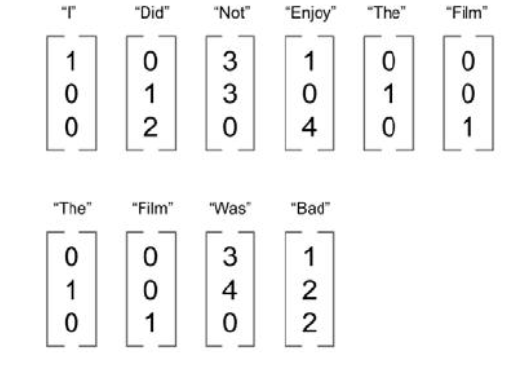


Nous pouvons représenter chacune de ces phrases comme une séquence de vecteurs de mots individuels, qui constitueraient ensuite notre entrée dans notre réseau de neurones. Cependant, comme nous pouvons le voir, chacune de nos entrées est d'une taille différente. Dans un graphe de calcul fixe, ces tailles d'entrée variables pourraient être un problème, mais pour des frameworks comme PyTorch, les modèles sont capables de s'ajuster dynamiquement pour tenir compte de la variation de la structure d'entrée. C'est l'une des raisons pour lesquelles PyTorch est souvent préféré pour l'apprentissage en profondeur lié à la PNL.

Une autre différence majeure entre PyTorch et d'autres frameworks d'apprentissage en profondeur est la syntaxe. PyTorch est souvent préféré par les développeurs ayant une expérience en Python car il est considéré comme étant de nature très Pythonique. PyTorch s'intègre bien avec d'autres aspects de l'écosystème Python et il est très facile à apprendre si vous avez une connaissance préalable de Python. Nous allons maintenant démontrer la syntaxe PyTorch en codant notre propre réseau de neurones à partir de zéro

## Construire un réseau de neurones simple dans PyTorch

Nous allons maintenant parcourir la construction d'un réseau de neurones à partir de zéro dans PyTorch. Ici, nous avons un petit fichier .csv contenant plusieurs exemples d'images de l'ensemble de données MNIST. L'ensemble de données MNIST consiste en une collection de chiffres dessinés à la main entre 0 et 9 que nous voulons tenter de classer. Ce qui suit est un exemple de l'ensemble de données MNIST.

Ces images sont au format 28x28 : 784 pixels au total. Notre ensemble de données dans train.csv se compose de 1 000 de ces images, chacune composée de 784 valeurs de pixels, ainsi que de la classification correcte du chiffre

## Loading the data

1. Tout d'abord, nous devons charger notre ensemble de données d'entraînement, comme suit :

In [3]:
import pandas as pd
train = pd.read_csv(r"https://github.com/PacktPublishing/Hands-On-Natural-Language-Processing-with-PyTorch-1.x/raw/master/Chapter02/train.csv")
train_labels = train['label'].values
train = train.drop("label",axis=1).values.reshape(len(train),1,28,28)

2. Ensuite, nous convertissons nos données d'entraînement et nos étiquettes d'entraînement en tenseurs PyTorch afin qu'ils puissent être introduits dans le réseau de neurones

In [6]:
import torch
X = torch.Tensor(train.astype(float))
y = torch.Tensor(train_labels).long()

Notez les types de données de ces deux tenseurs. Un tenseur flottant comprend des nombres à virgule flottante de 32 bits, tandis qu'un tenseur long se compose d'entiers de 64 bits. Nos caractéristiques X doivent être flottantes pour que PyTorch puisse calculer des gradients, tandis que nos étiquettes doivent être des entiers dans ce modèle de classification (car nous essayons de prédire les valeurs de 1, 2, 3, etc.) , donc une prédiction de 1,5 n'aurait pas de sens

## Construire le modèle de classification


In [8]:
from torch import nn, optim

class MNISTClassifier(nn.Module):    
  def __init__(self):        
    super().__init__()        
    self.fc1 = nn.Linear(784, 392)        
    self.fc2 = nn.Linear(392, 196)        
    self.fc3 = nn.Linear(196, 98) 
    self.fc4 = nn.Linear(98, 10)
    self.dropout = nn.Dropout(p=0.2)

  def forward(self, x):        
    x = x.view(x.shape[0], -1)        
    x = self.dropout(F.relu(self.fc1(x)))        
    x = self.dropout(F.relu(self.fc2(x)))        
    x = self.dropout(F.relu(self.fc3(x)))        
    x = F.log_softmax(self.fc4(x), dim=1)
    return x

Nous construisons notre classificateur comme si nous construisions une classe normale en Python, héritant de nn.Module dans PyTorch. Dans notre méthode init, nous définissons chacune des couches de notre réseau de neurones. Ici, nous définissons des couches linéaires entièrement connectées de différentes tailles.

Notre première couche prend 784 entrées car c'est la taille de chacune de nos images à classer (28x28). Nous voyons alors que la sortie d'une couche doit avoir la même valeur que l'entrée de la suivante, ce qui signifie que notre première couche entièrement connectée produit 392 unités et notre deuxième couche prend 392 unités en entrée. Cela est répété pour chaque couche, avec la moitié du nombre d'unités à chaque fois jusqu'à ce que nous atteignions notre couche finale entièrement connectée, qui génère 10 unités. C'est la longueur de notre couche de classification.

Ici, nous pouvons voir que notre couche finale génère 10 unités. C'est parce que nous souhaitons prédire si chaque image est un chiffre entre 0 et 9, ce qui représente 10 classifications possibles différentes au total. Notre sortie est un vecteur de longueur 10 et contient des prédictions pour chacune des 10 valeurs possibles de l'image. Lors d'une classification finale, nous prenons la classification numérique qui a la valeur la plus élevée comme prédiction finale du modèle. Par exemple, pour une prédiction donnée, notre modèle peut prédire que l'image est de type 1 avec une probabilité de 10 %, de type 2 avec une probabilité de 10 % et de type 3 avec une probabilité de 80 %. Nous prendrions donc le type 3 comme prédiction car il a été prédit avec la probabilité la plus élevée

### Mettre en œuvre la dropout


Dans la méthode init de notre classe MNISTClassifier, nous définissons également une méthode dropout afin d'aider à régulariser le réseau :

    self.dropout = nn.Dropout(p=0.2)

Le dropout est un moyen de régulariser nos réseaux de neurones pour éviter les verfitting . À chaque époque d'apprentissage, pour chaque nœud d'une couche auquel dropout est appliqué, il existe une probabilité (ici, définie comme p = 20 %) que chaque nœud de la couche ne sera pas utilisé dans l'apprentissage/la rétropropagation. Cela signifie que lors de la formation, notre réseau devient robuste face au dépassement puisque chaque nœud ne sera pas utilisé à chaque itération du processus de formation. Cela empêche notre réseau de devenir trop dépendant des prédictions de nœuds spécifiques au sein de notre réseau

## Dénir la passe avant

Ensuite, nous définissons la passe avant au sein de notre classificateur :

In [25]:
def forward(self, x):        
  x = x.view(x.shape[0], -1)        
  x = self.dropout(F.relu(self.fc1(x)))        
  x = self.dropout(F.relu(self.fc2(x)))        
  x = self.dropout(F.relu(self.fc3(x)))        
  x = F.log_softmax(self.fc4(x), dim=1)
  return x

MNISTClassifier.forward = forward

La méthode forward() de notre classificateur est l'endroit où nous appliquons nos fonctions d'activation et définissons où dropout est appliqué au sein de notre réseau. Notre méthode forward définit le chemin que notre entrée empruntera à travers le réseau. Il prend d'abord notre entrée, x, et la remodèle pour une utilisation au sein du réseau, la transformant en un vecteur unidimensionnel. Nous la passons ensuite à travers notre première couche entièrement connectée et l'enveloppons dans une fonction d'activation ReLU pour la rendre non linéaire. Nous l'enveloppons également dans notre dropout, comme défini dans notre méthode init. Nous répétons ce processus pour toutes les autres couches du réseau.

## Définition des paramètres du modèle

Ensuite, nous définissons les paramètres de notre modèle :

In [9]:
model = MNISTClassifier()
loss_function = nn.NLLLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

Nous initialisons une instance de notre classe MNISTClassifier en tant que modèle. Nous définissons également notre perte comme une perte de probabilité de log négatif

$$Loss(y) = -log(y)$$


Supposons que notre image soit celle d'un nombre 7. Si nous prédisons la classe 7 avec probabilité 1, notre perte sera -log(1) = 0, mais si nous prédisons uniquement la classe 7 avec probabilité 0,7, notre perte sera -log(0,7 ) = 0,3. Cela signifie que notre perte approche l'infini plus nous nous éloignons de la prédiction correcte.

Cela est ensuite additionné sur toutes les classes correctes de notre ensemble de données pour calculer la perte totale. Notez que nous avons défini un log softmax lors de la construction du classificateur car celui-ci applique déjà une fonction softmax (restreignant la sortie prévue entre 0 et 1) et prend le log. Cela signifie que log(y) est déjà calculé, donc tout ce que nous devons faire pour calculer la perte totale sur le réseau est de calculer la somme négative des sorties.

Nous définirons également notre optimiseur comme un optimiseur Adam. Un optimiseur contrôle le taux d'apprentissage au sein de notre modèle. Le taux d'apprentissage d'un modèle définit l'importance des mises à jour des paramètres à chaque époque d'entraînement. Plus la taille du taux d'apprentissage est grande, plus la taille des mises à jour des paramètres est importante pendant la descente de gradient. Un optimiseur contrôle dynamiquement ce taux d'apprentissage de sorte que lorsqu'un modèle est initialisé, les mises à jour des paramètres soient importantes. Cependant, à mesure que le modèle apprend et se rapproche du point où la perte est minimisée, l'optimiseur contrôle le taux d'apprentissage, de sorte que les mises à jour des paramètres deviennent plus petites et que le minimum local peut être localisé plus précisément.

## Former notre réseau

Enfin, nous pouvons réellement commencer à former notre réseau:

1. Tout d'abord, créez une boucle qui s'exécute une fois pour chaque époque de notre entraînement. Ici, nous allons exécuter notre boucle d'entraînement pendant 50 époques. Nous prenons d'abord notre tenseur d'images d'entrée et notre tenseur d'étiquettes de sortie et les transformons en variables PyTorch. Une variable est un objet PyTorch qui contient une méthode backward() que nous pouvons utiliser pour effectuer une rétropropagation via notre réseau :

    images = Variable(X)

    labels = Variable(y)


2. Ensuite, nous appelons zero_grad() sur notre optimiseur pour définir nos gradients calculés à zéro. Dans PyTorch, les gradients sont calculés cumulativement sur chaque rétropropagation. Bien que cela soit utile dans certains modèles, comme lors de la formation de RNN, pour notre exemple, nous souhaitons calculer les gradients à partir de zéro après chaque époque, nous nous assurons donc de remettre les gradients à zéro après chaque passage :

     opt.zero_grad()

3. Ensuite, nous utilisons l'état actuel de notre modèle pour faire des prédictions sur notre ensemble de données. C'est exactement notre passe avant car nous utilisons ensuite ces prédictions pour calculer notre perte :

    outputs = model(images)


4. À l'aide des sorties et des véritables étiquettes de notre ensemble de données, nous calculons la perte totale de notre modèle à l'aide de la fonction de perte définie, qui dans ce cas est le log de vraisemblance négatif. Lors du calcul de cette perte, nous pouvons ensuite effectuer un appel backward() pour rétropropager notre perte sur le réseau. Nous utilisons ensuite step() à l'aide de notre optimiseur afin de mettre à jour nos paramètres de modèle en conséquence.


    loss = loss_function(outputs, labels)
    loss.backward()
    opt.step()


5. Enfin, après chaque époque terminée, nous imprimons la perte totale. Nous pouvons observer ceci pour nous assurer que notre modèle apprend :

    print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, 50, loss.data.item()))



In [11]:
from torch.autograd import Variable
import torch.nn.functional as F

for epoch in range(50):    
    images = Variable(X)
    labels = Variable(y)

    opt.zero_grad()
    outputs = model(images)

    loss = loss_function(outputs, labels)
    loss.backward()
    opt.step()

    print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, 50, loss.data.item()))

Epoch [1/50] Loss: 0.0782
Epoch [2/50] Loss: 0.0682
Epoch [3/50] Loss: 0.0739
Epoch [4/50] Loss: 0.0599
Epoch [5/50] Loss: 0.0556
Epoch [6/50] Loss: 0.0486
Epoch [7/50] Loss: 0.0531
Epoch [8/50] Loss: 0.0387
Epoch [9/50] Loss: 0.0357
Epoch [10/50] Loss: 0.0477
Epoch [11/50] Loss: 0.0562
Epoch [12/50] Loss: 0.0447
Epoch [13/50] Loss: 0.0370
Epoch [14/50] Loss: 0.0336
Epoch [15/50] Loss: 0.0264
Epoch [16/50] Loss: 0.0372
Epoch [17/50] Loss: 0.0287
Epoch [18/50] Loss: 0.0413
Epoch [19/50] Loss: 0.0321
Epoch [20/50] Loss: 0.0315
Epoch [21/50] Loss: 0.0282
Epoch [22/50] Loss: 0.0248
Epoch [23/50] Loss: 0.0383
Epoch [24/50] Loss: 0.0269
Epoch [25/50] Loss: 0.0205
Epoch [26/50] Loss: 0.0233
Epoch [27/50] Loss: 0.0263
Epoch [28/50] Loss: 0.0374
Epoch [29/50] Loss: 0.0229
Epoch [30/50] Loss: 0.0154
Epoch [31/50] Loss: 0.0254
Epoch [32/50] Loss: 0.0187
Epoch [33/50] Loss: 0.0268
Epoch [34/50] Loss: 0.0182
Epoch [35/50] Loss: 0.0159
Epoch [36/50] Loss: 0.0196
Epoch [37/50] Loss: 0.0234
Epoch [38/

## Faire des prédictions

Maintenant que notre modèle a été entraîné, nous pouvons l'utiliser pour faire des prédictions sur des données de test . Nous commençons par lire dans notre ensemble de données de test (qui n'a pas été utilisé pour entraîner notre modèle) :

In [12]:
test = pd.read_csv("https://github.com/PacktPublishing/Hands-On-Natural-Language-Processing-with-PyTorch-1.x/raw/master/Chapter02/test.csv")
test_labels = test['label'].values
test = test.drop("label",axis=1).values.reshape(len(test),1,28,28)

X_test = torch.Tensor(test.astype(float))
y_test = torch.Tensor(test_labels).long()

Ici, nous effectuons les mêmes étapes que celles que nous avons effectuées lorsque nous avons chargé notre ensemble de données d'apprentissage : nous remodelons nos données de test et les transformons en tenseurs PyTorch. Ensuite, pour prédire à l'aide de notre modèle entraîné, nous exécutons simplement la commande suivante

In [13]:
preds = model(X_test)

De la même manière que nous avons calculé nos sorties sur le passage avant de nos données d'entraînement dans notre modèle, nous passons maintenant nos données de test à travers le modèle et obtenons des prédictions. Nous pouvons voir les prédictions pour l'une des images comme ça

In [14]:
print(preds[0])

tensor([-2.0021e+01, -1.4102e+01, -1.7298e+01, -1.6051e+01, -1.9095e+01,
        -1.7890e+01, -2.2838e+01, -1.5587e+01, -7.5301e+00, -5.3773e-04],
       grad_fn=<SelectBackward>)


Ici, nous pouvons voir que notre prédiction est un vecteur de longueur 10, avec une prédiction pour chacune des classes possibles (chiffres entre 0 et 9). Celui avec la valeur prédite la plus élevée est celui que notre modèle choisit comme prédiction. Dans ce cas, il s'agit de la 10e unité de notre vecteur, ce qui équivaut au chiffre 9. Notez que puisque nous avons utilisé log softmax plus tôt, nos prédictions sont des logs et non des probabilités brutes. Pour les reconvertir en probabilités, nous pouvons simplement les transformer en utilisant 
exp

Nous pouvons maintenant construire un DataFrame récapitulatif contenant nos véritables étiquettes de données de test, ainsi que les étiquettes prédites par notre modèle :

In [15]:
_, predictionlabel = torch.max(preds.data, 1)
predictionlabel = predictionlabel.tolist()

predictionlabel = pd.Series(predictionlabel)
test_labels = pd.Series(test_labels)

pred_table = pd.concat([predictionlabel, test_labels], axis=1)
pred_table.columns =['Predicted Value', 'True Value']

In [40]:
pred_table

,Predicted Value,True Value
0,9,9
1,8,5
2,2,2
3,4,4
4,1,1
...,...,...
195,3,3
196,1,1
197,4,4
198,4,4


Notez comment la fonction torch.max() sélectionne automatiquement la prédiction avec la valeur la plus élevée. Nous pouvons voir ici que, sur la base d'une petite sélection de nos données, notre modèle semble faire de bonnes prédictions !

## Évaluation de notre modèle

Maintenant que nous avons quelques prédictions de notre modèle, nous pouvons utiliser ces prédictions pour évaluer la qualité de notre modèle. Une façon rudimentaire d'évaluer les performances d'un modèle est la précision,. Ici, nous calculons simplement nos prédictions correctes (où l'étiquette d'image prédite est égale à l'étiquette d'image réelle) en pourcentage du nombre total de prédictions faites par notre modèle :

In [16]:
preds = len(predictionlabel)
correct = len([1 for x,y in zip(predictionlabel, test_labels) if x==y])
print((correct/preds)*100)

90.5


Toutes nos félicitations! Votre premier réseau de neurones a pu identifier correctement près de 90 % des images numériques . Au fur et à mesure que nous progressons, nous verrons qu'il existe des modèles plus sophistiqués qui peuvent conduire à une amélioration des performances. Cependant, pour l'instant, nous avons démontré que la création d'un simple réseau de neurones profonds est très simple à l'aide de PyTorch. Cela peut être codé en quelques lignes et conduit à des performances au-delà de ce qui est possible avec les modèles d'apprentissage automatique de base tels que la régression



